In [1]:
from src.fncs.nodes import *

/Users/vassilistsoubris/PycharmProjects/HealthBot/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/vassilistsoubris/PycharmProjects/HealthBot/src/fncs/nodes.py:23: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search_tool = TavilySearchResults(max_results=5)


In [2]:
workflow = StateGraph(state_schema=HealthBotState)

# Add nodes
workflow.add_node("ask_health_topic", ask_health_topic)
workflow.add_node("search_health_info", search_health_info)
workflow.add_node("summarize_health_info", summarize_health_info)
workflow.add_node("present_summary", present_summary)
workflow.add_node("prompt_for_quiz", prompt_for_quiz)
workflow.add_node("create_quiz_questions", create_quiz_questions)
workflow.add_node("present_quiz_question", present_quiz_question)
workflow.add_node("collect_quiz_answer", collect_quiz_answer)
workflow.add_node("grade_quiz_answer", grade_quiz_answer)
workflow.add_node("present_feedback", present_feedback)
workflow.add_node("suggest_related_topics", suggest_related_topics)
workflow.add_node("ask_next_action", ask_next_action)
workflow.add_node("end_conversation", end_conversation)
workflow.add_node("router", router)

# Add edges
workflow.add_edge(START, "ask_health_topic")
workflow.add_edge("ask_health_topic", "search_health_info")
workflow.add_edge("search_health_info", "summarize_health_info")
workflow.add_edge("summarize_health_info", "present_summary")
workflow.add_edge("present_summary", "prompt_for_quiz")
workflow.add_edge("prompt_for_quiz", "create_quiz_questions")
workflow.add_edge("create_quiz_questions", "present_quiz_question")
workflow.add_edge("present_quiz_question", "collect_quiz_answer")
workflow.add_edge("collect_quiz_answer", "grade_quiz_answer")
workflow.add_edge("grade_quiz_answer", "present_feedback")
workflow.add_edge("present_feedback", "router")
workflow.add_edge("suggest_related_topics", "ask_next_action")
workflow.add_edge("ask_next_action", "router")

# Add conditional edges
workflow.add_conditional_edges(
    "router",
    {
        "ask_health_topic": lambda state: state.get("next_action") == "new_topic",
        "suggest_related_topics": lambda state: state.get("quiz_ready") is False,
        "present_quiz_question": lambda state: state.get("quiz_ready") and state.get("current_question_index", 0) < state.get("num_questions", 1),
        "end_conversation": lambda state: state.get("next_action") == "exit",
    }
)

workflow.add_edge("end_conversation", END)

# Compile the workflow
graph = workflow.compile()

In [4]:
graph.nodes

{'__start__': <langgraph.pregel.read.PregelNode at 0x113585460>,
 'ask_health_topic': <langgraph.pregel.read.PregelNode at 0x11339c800>,
 'search_health_info': <langgraph.pregel.read.PregelNode at 0x11324b9e0>,
 'summarize_health_info': <langgraph.pregel.read.PregelNode at 0x1135720c0>,
 'present_summary': <langgraph.pregel.read.PregelNode at 0x112fe03b0>,
 'prompt_for_quiz': <langgraph.pregel.read.PregelNode at 0x113359370>,
 'create_quiz_questions': <langgraph.pregel.read.PregelNode at 0x113572630>,
 'present_quiz_question': <langgraph.pregel.read.PregelNode at 0x1132138f0>,
 'collect_quiz_answer': <langgraph.pregel.read.PregelNode at 0x113212f30>,
 'grade_quiz_answer': <langgraph.pregel.read.PregelNode at 0x11324b920>,
 'present_feedback': <langgraph.pregel.read.PregelNode at 0x10bc6c200>,
 'suggest_related_topics': <langgraph.pregel.read.PregelNode at 0x112db40b0>,
 'ask_next_action': <langgraph.pregel.read.PregelNode at 0x11339d070>,
 'end_conversation': <langgraph.pregel.read.Pre

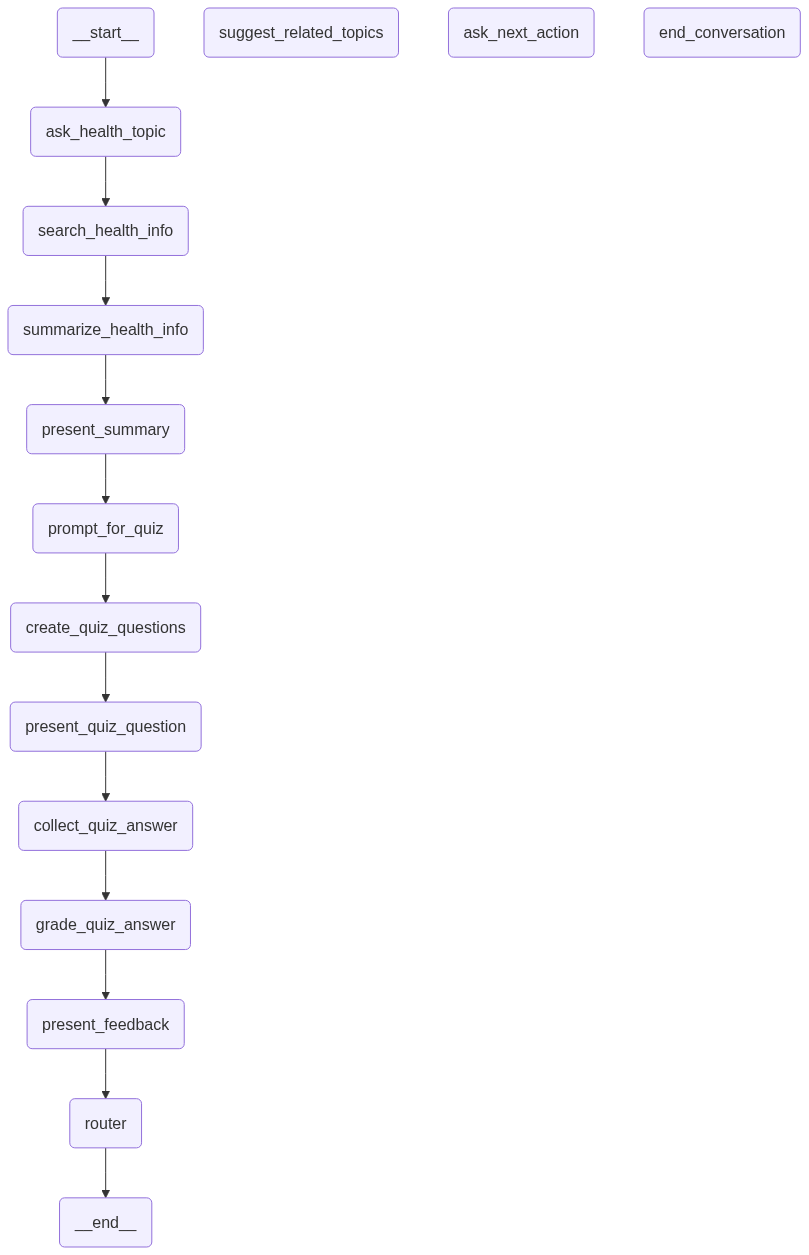

In [8]:
from IPython.display import Image, display
display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)